In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [2]:
impath = './dataset/mod/mod_1.jpg'

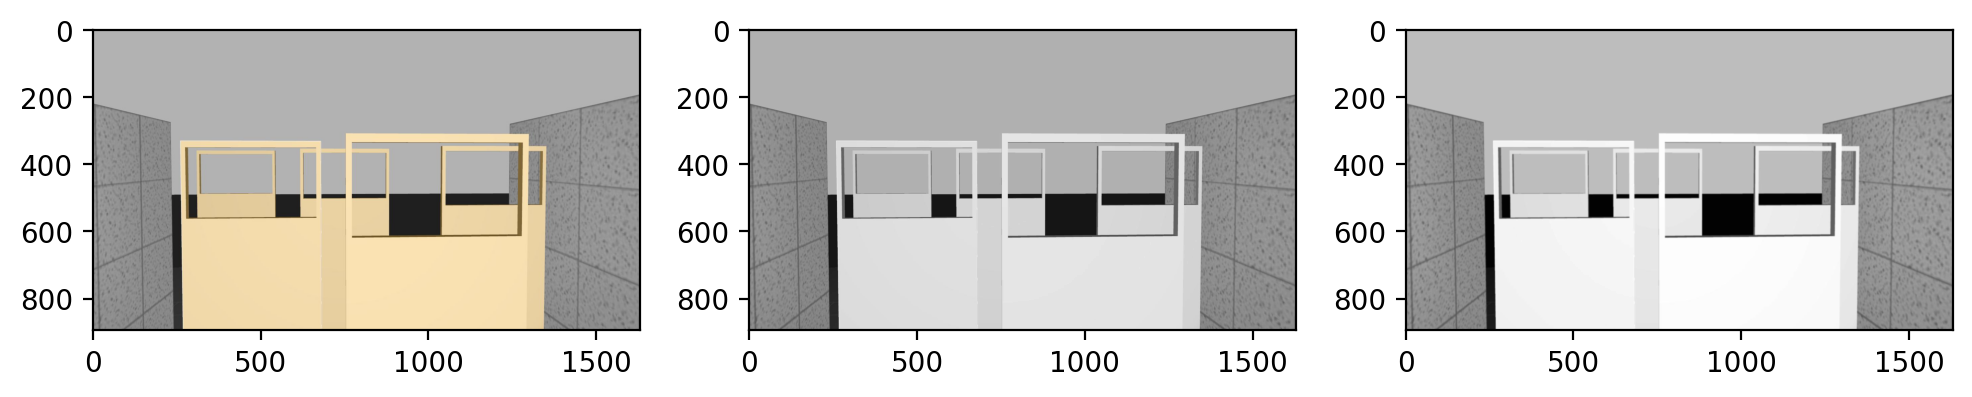

In [3]:
img = cv.imread(impath, cv.IMREAD_COLOR)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5,5), 0)

plt.axis('off')

plt.subplot(1, 3, 1)
plt.imshow(rgb)

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(blur, cmap="gray")

plt.show()

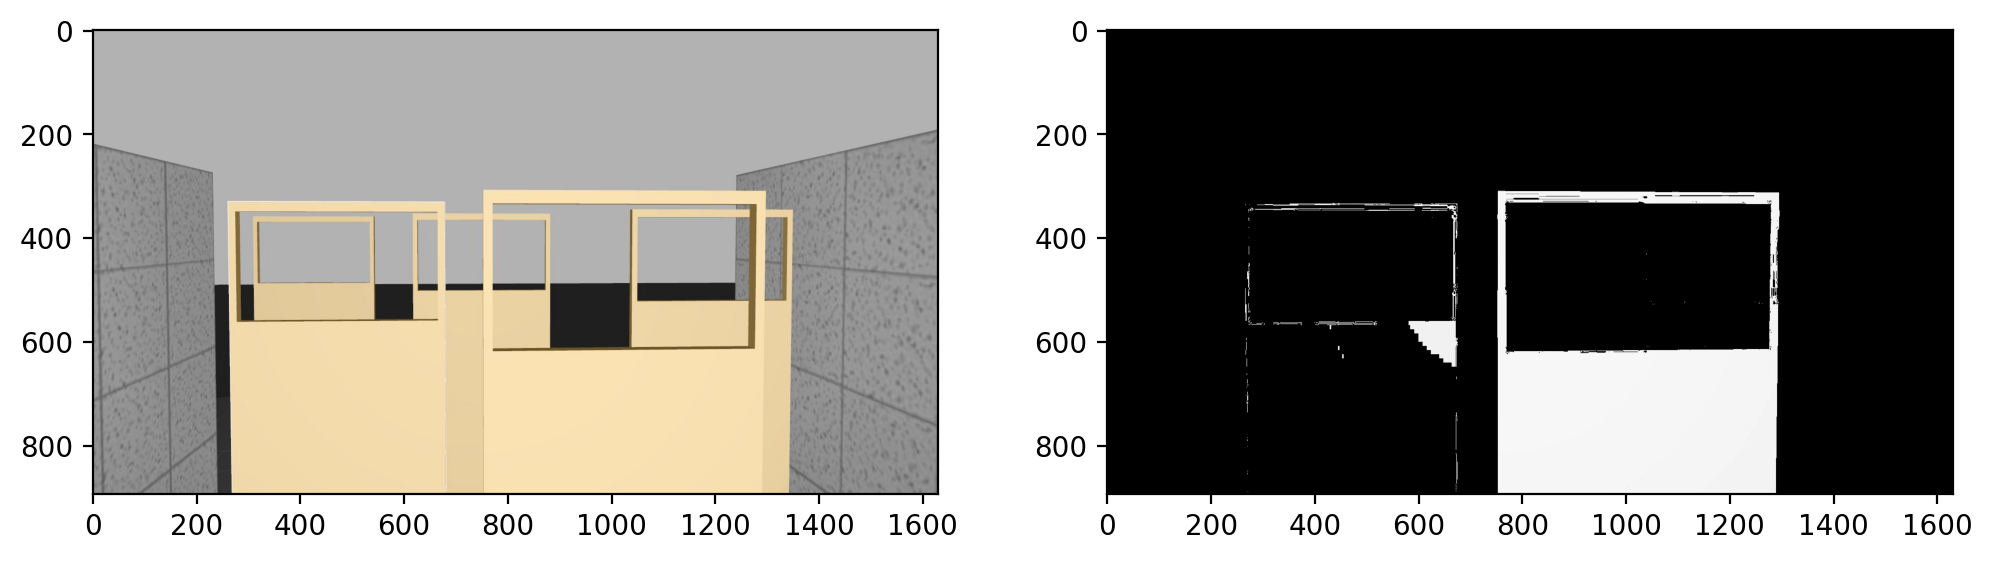

In [4]:
# HSV Mask on Image
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# #fae2b2
lower = np.array([15, 70, 245], dtype=np.uint8)
upper = np.array([25, 80, 255], dtype=np.uint8)

mask = cv.inRange(hsv, lower, upper)
masked = cv.bitwise_and(img, img, mask=mask)

gray_masked = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# plt.subplot(2, 2, 1)
# plt.imshow(img)

plt.subplot(1, 2, 1)
plt.imshow(rgb)

plt.subplot(1, 2, 2)
plt.imshow(gray_masked, cmap='gray')

# plt.subplot(2, 2, 4)
# plt.imshow(result)

In [5]:
kernel = np.ones((5, 5), dtype=np.uint8)
eroded = cv.erode(gray_masked, kernel, iterations=3)
dilated = cv.dilate(gray_masked, kernel, iterations=1)

opened = cv.morphologyEx(gray_masked, cv.MORPH_OPEN, kernel)

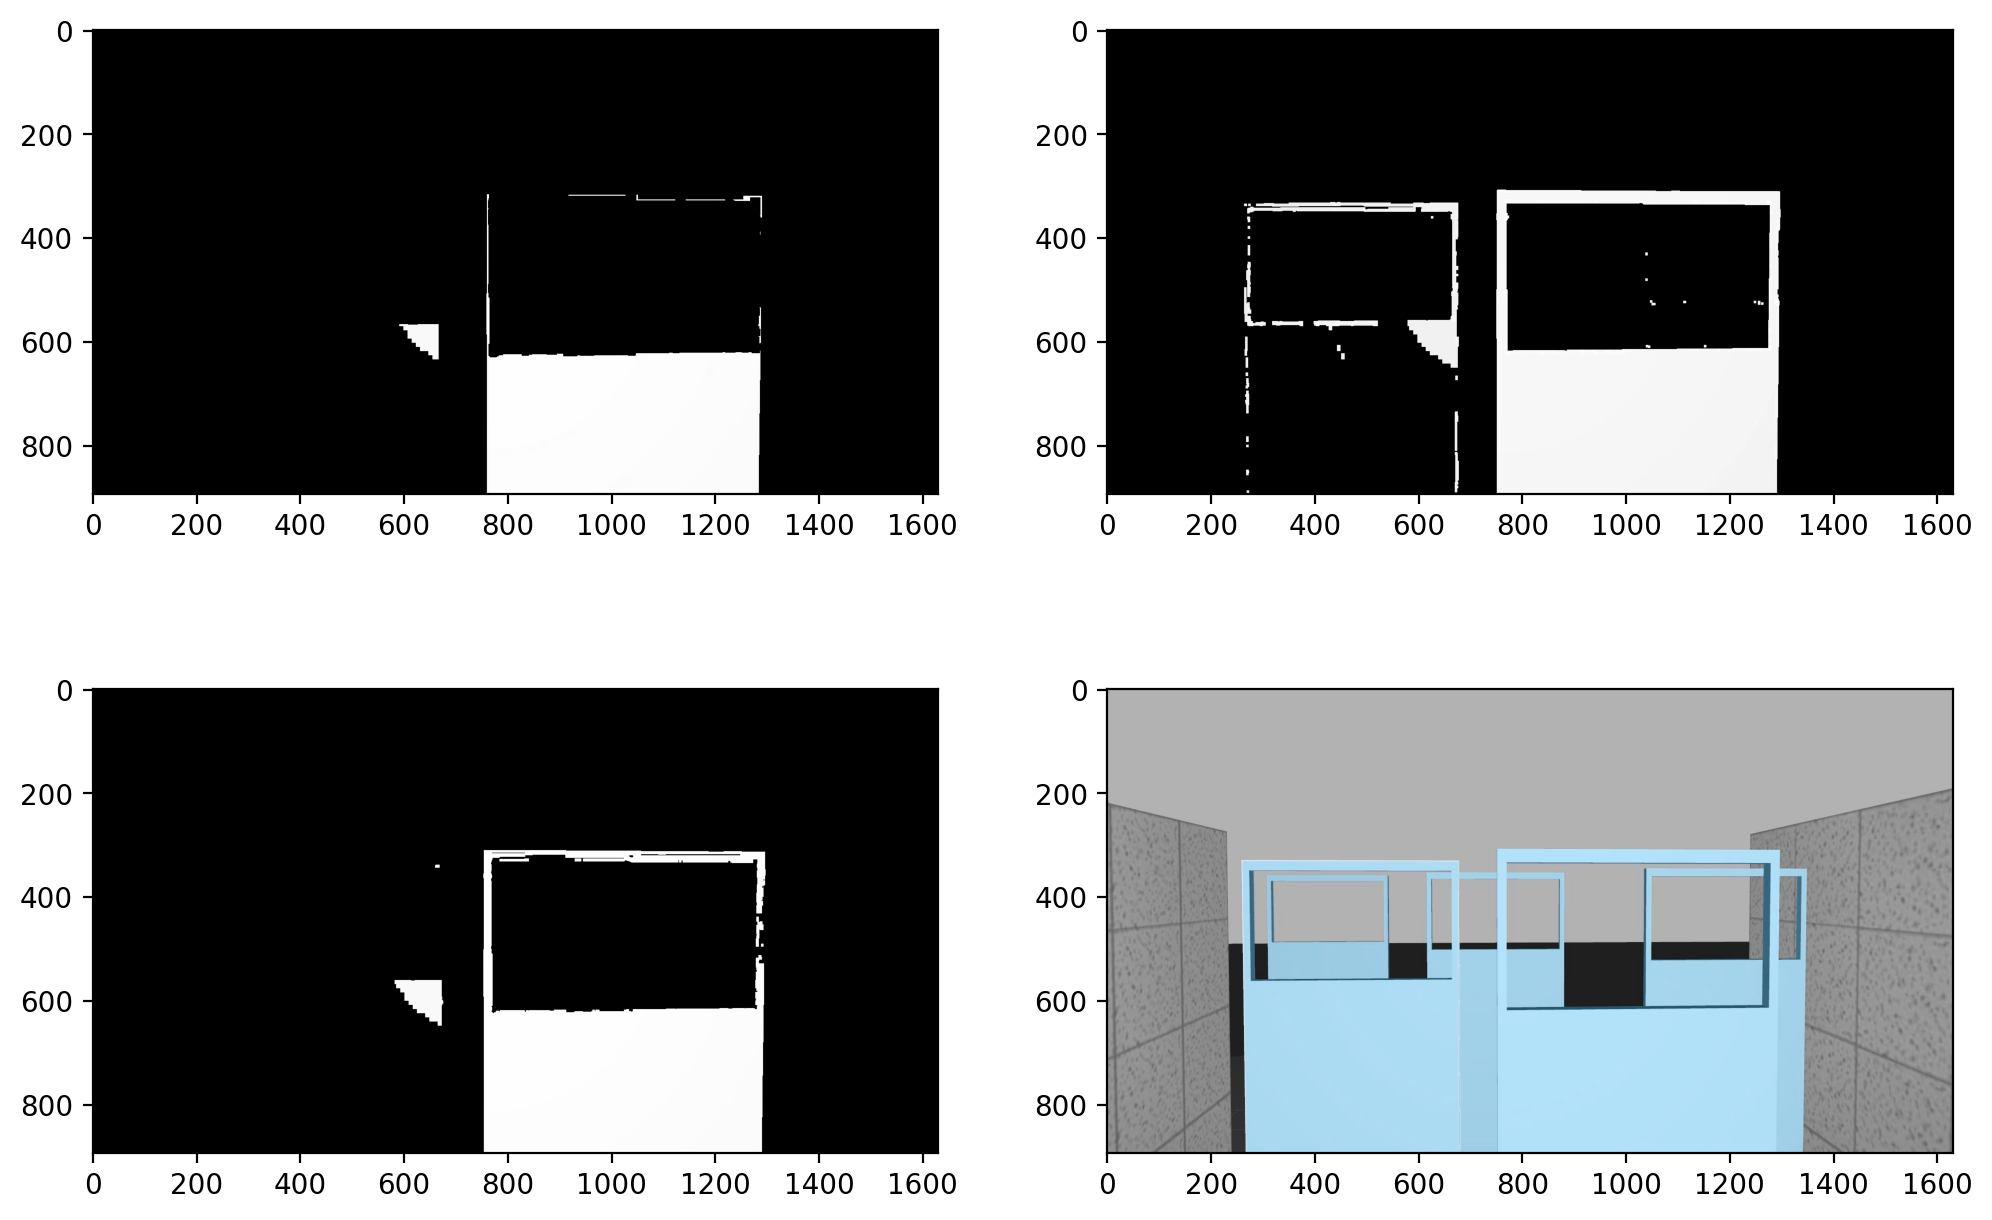

In [6]:
plt.subplot(2, 2, 1)
plt.imshow(eroded, cmap="gray")

plt.subplot(2, 2, 2)
plt.imshow(dilated, cmap="gray")

plt.subplot(2, 2, 3)
plt.imshow(opened, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(img)

plt.show()

In [7]:
th_gaus = cv.adaptiveThreshold(dilated, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5)
th_mean = cv.adaptiveThreshold(dilated, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 5)

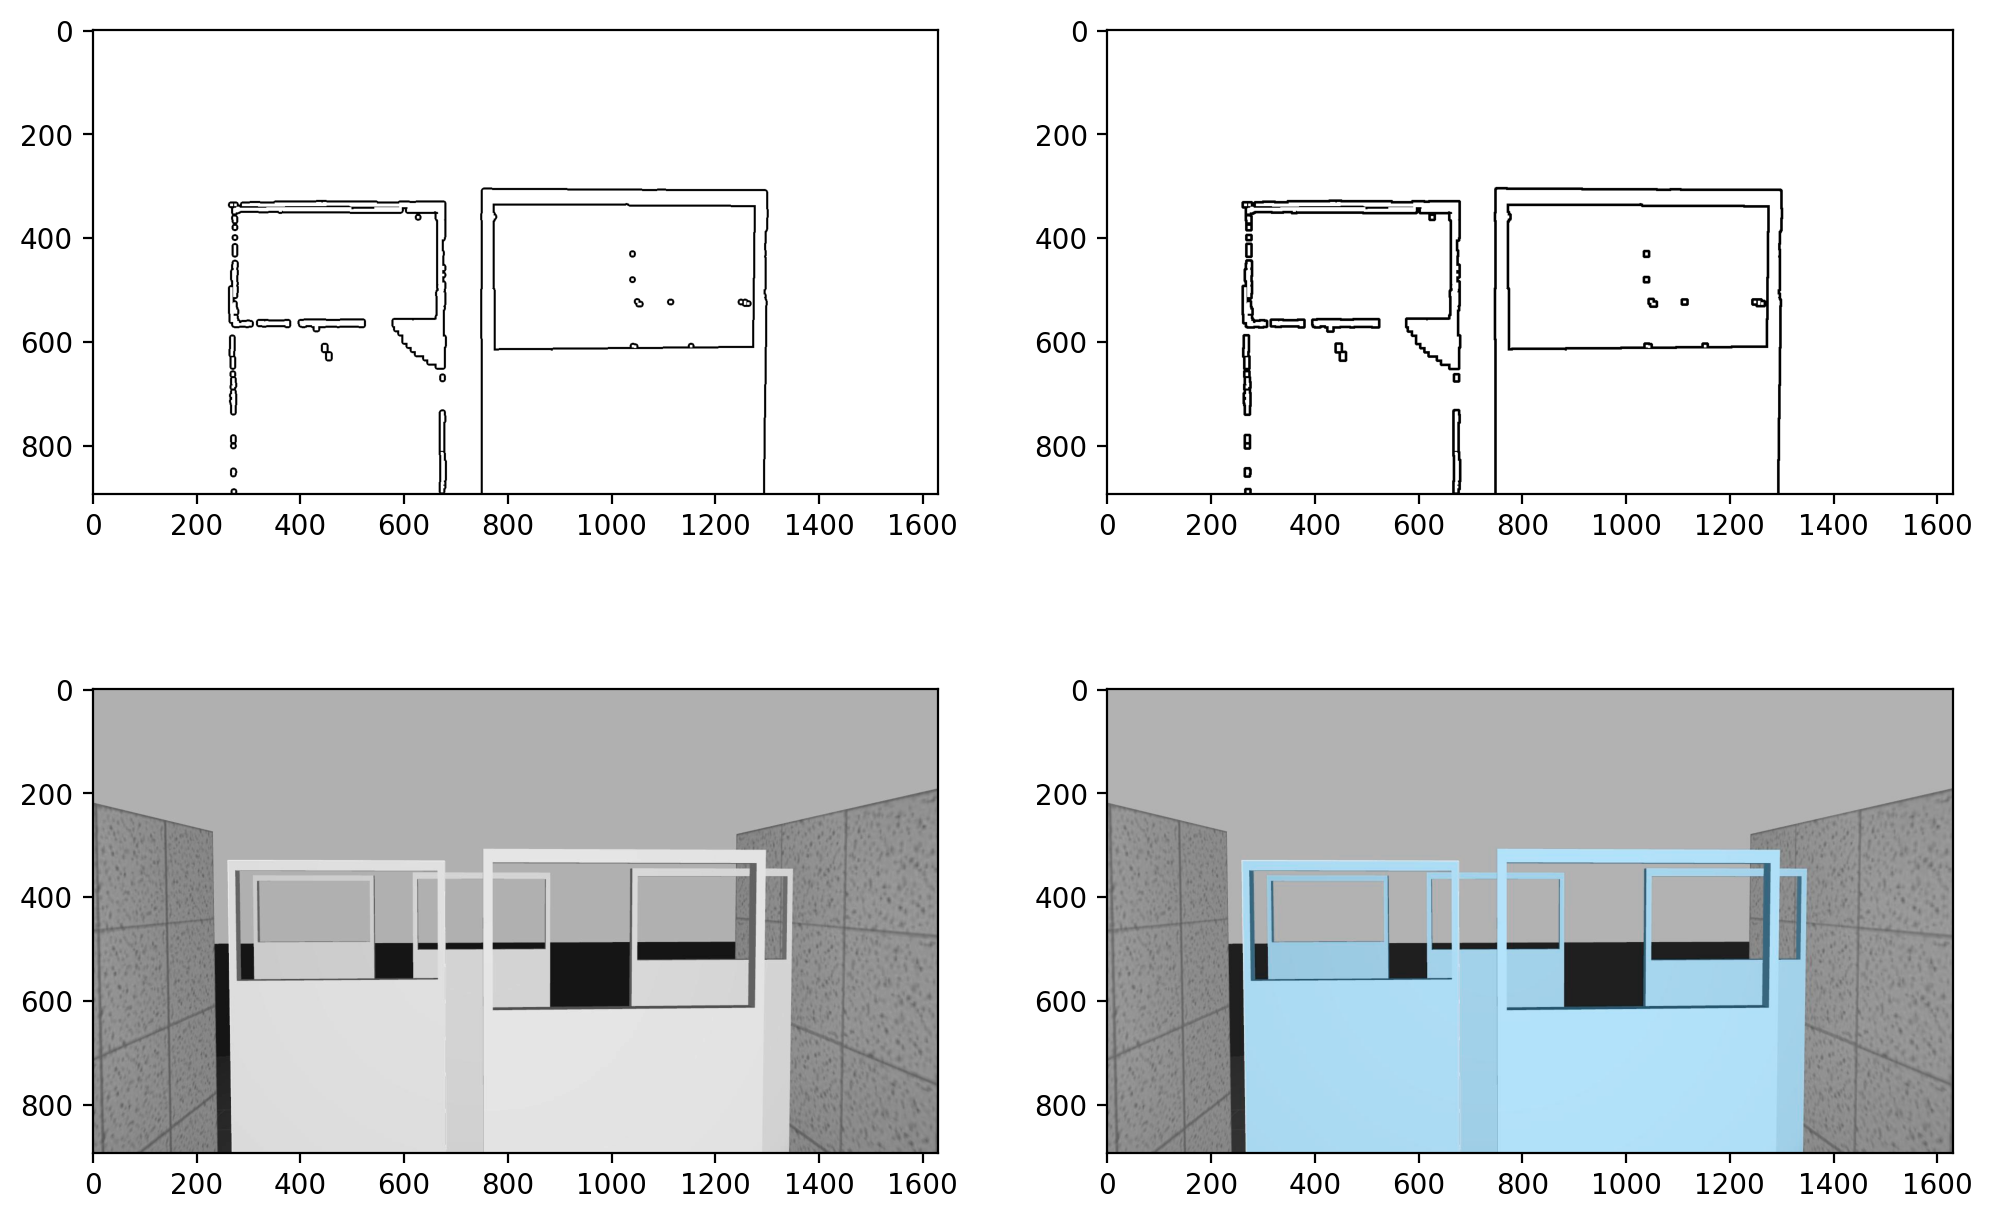

In [8]:
plt.subplot(2, 2, 1)
plt.imshow(th_gaus, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.imshow(th_mean, cmap='gray', vmin=0, vmax=255)


plt.subplot(2, 2, 3)
plt.imshow(gray, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(img)

In [9]:
img_gray_edged = cv.Canny(gray_masked, 30, 200)
img_blur_edged = cv.Canny(dilated, 30, 200)
img_gaus_edged = cv.Canny(th_gaus, 30, 200)
img_mean_edged = cv.Canny(th_mean, 30, 200)

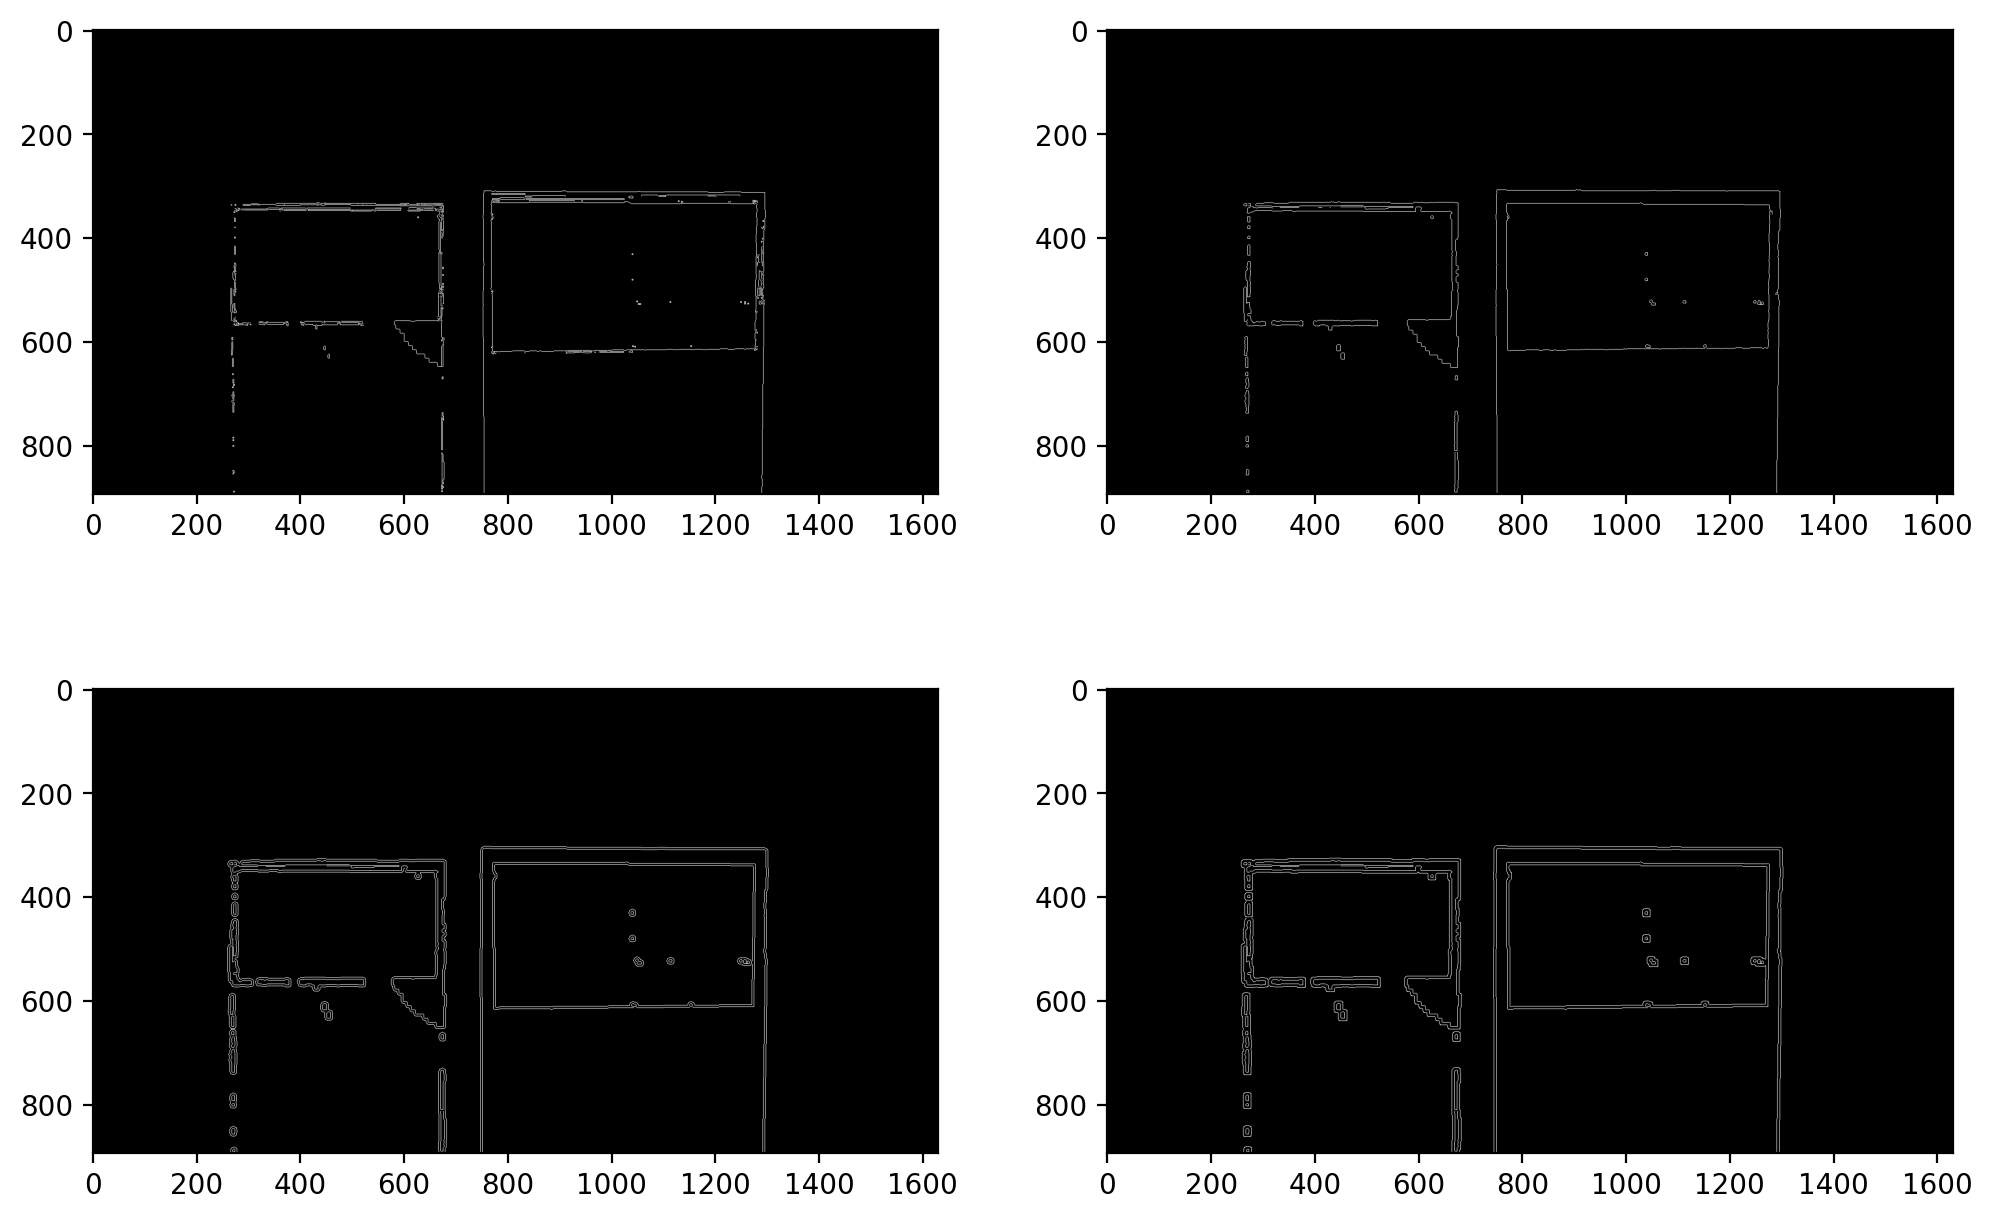

In [10]:
plt.subplot(2, 2, 1)
plt.imshow(img_gray_edged, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(img_blur_edged, cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(img_gaus_edged, cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(img_mean_edged, cmap='gray')

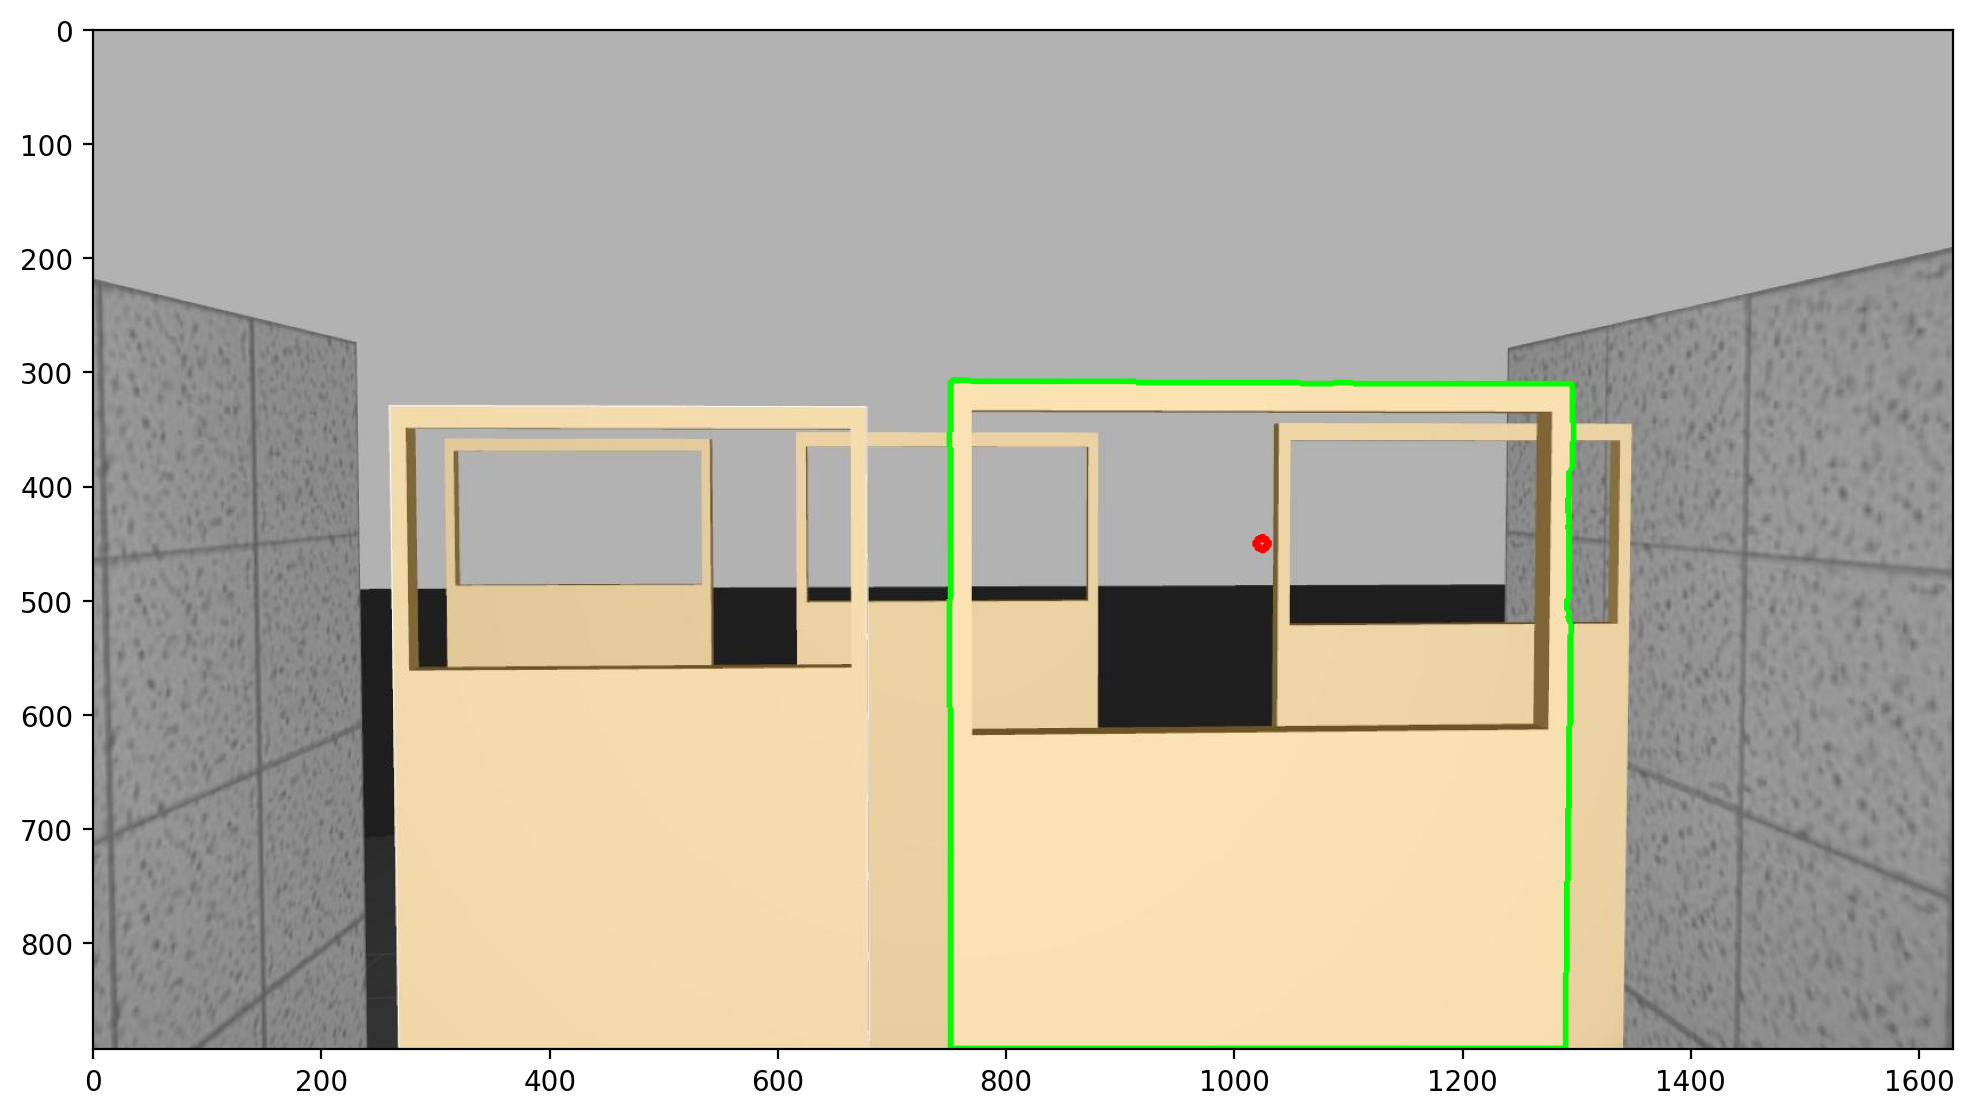

In [11]:
contours, hierarchy = cv.findContours(dilated, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

contour = max(contours, key=cv.contourArea)
boundingRect = cv.boundingRect(contour)

_ = cv.drawContours(rgb, [contour], -1, (0, 255, 0), 3)
# _ = cv.drawContours(img, [boundingRect], -1, (0, 255, 0), 3)

cv.circle(rgb, center=(boundingRect[0] + boundingRect[2] // 2, 450), radius=5, color=(255, 0, 0), thickness=5)

plt.imshow(rgb)